In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, random, seed
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, accuracy_score

In [105]:
TRAIN_PATH = 'dataset/train1x5.csv'
TEST_PATH = 'dataset/test1x5.csv'

train_redu = pd.read_csv('dataset/train_redu.csv')
test_redu = pd.read_csv('dataset/test_redu.csv')

Construindo vetores

In [106]:
X_train = [(x,y) for x, y in zip(train_redu['intensidade'], train_redu['simetria'])]
y_train_initial = train_redu['label']

X_test = [(x,y) for x, y in zip(test_redu['intensidade'], test_redu['simetria'])]
y_test = test_redu['label']

In [107]:
X_train = np.array(X_train)
y_train_initial = np.array(y_train_initial)
X_test = np.array(X_test)
y_test_initial = np.array(y_test)

Funções sobre filtragem de classes

In [362]:
classes = np.unique(y_train_initial)

def classe_digito(digi, y_train = y_train_initial):

    # digi é o digito q eu quero usar no 1 para todos naquele momento

    y_train_bin = np.where(y_train == digi, 1, -1)

    return y_train_bin
    

In [221]:
def novo_treino(digito_novo, y_pred_anterior, y_train_anterior):
    # y_pred_anterior é o vetor de predições do classificador anterior
    # digito_novo é o digito que eu quero classificar
    #print('digito anterior', digito_novo)
    #i = np.where(classes == digito_novo)[0][0] # pega o indice do digito novo
    #digito_anterior = classes[i-1]

    # eu deixo no treino só os digitos q não foram classificados como o digito anterior
    y_train = y_train_anterior.copy()

    novos_indices = np.where(y_pred_anterior == -1) # indices dos novos elementos
    
    print('novos_indices', novos_indices)
    
    y_train_novo = y_train_initial[novos_indices[0]]

    print('y_train_novo', y_train_novo)

    y_train_bin = classe_digito(digito_novo, y_train_novo)



    return y_train_bin, novos_indices

    
    

In [156]:
y_train_initial

array([0, 0, 0, ..., 5, 5, 5])

In [69]:
len(X_train)

2186

# Perceptron 

- Tem que ser max_iter = n de pontos
- Guardar a melhor solução
- w pode comecar com 0 ou random

A linha de decisão é dada pela equação: $w_1x_1+w_2x_2+b=0$, onde $w_1 e w_2$​ são os pesos e b é o viés.

$h(x) = sign(w^Tx)$

$w=w+y_ix_i$

In [425]:
class PocketPla():
    def __init__(self, max_iter):
        self.max_iter = max_iter
        self.best_w = None
        self.best_eIN = np.inf
        self.iterations = 0

    def constroiListaPCI(self, X, y, w):
        return np.where(np.sign(X @ w) != y)[0]
    
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(np.dot(X, self.best_w))
    
 
    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))
        w = np.zeros(X.shape[1])  # Adaptando para o tamanho correto
        self.best_w = w.copy()

        for _ in range(self.max_iter):
            self.iterations += 1
            listaPCI = self.constroiListaPCI(X, y, w)
            error_count = len(listaPCI)

            if error_count < self.best_eIN:
                self.best_eIN = error_count
                self.best_w = w.copy()

            if error_count == 0:
                break

            i = np.random.choice(listaPCI)  # Escolhe um índice aleatório da lista PCI
            w += y[i] * X[i]  # Atualização do vetor de pesos
              # Calcula o erro de classificação

    
        
        return self
    def plot_decision_boundary(self, X, y, digi, color = 'black',plot=True):
        """
        Plota a fronteira de decisão para o modelo atual.
        
        X: Dados de entrada.
        y: Labels binários (-1, 1).
        digi: O dígito sendo classificado.
        plot: Se True, cria uma nova figura. Se False, sobrepõe no gráfico existente.
        """
        if plot:
            plt.figure(figsize=(8, 6))
            
        # Desenhando a linha de decisão
        x1_min, x1_max = min(X[:, 0]), max(X[:, 0])
        x2_min = - (self.best_w[0] + self.best_w[1] * x1_min) / self.best_w[2]
        x2_max = - (self.best_w[0] + self.best_w[1] * x1_max) / self.best_w[2]
        plt.plot([x1_min, x1_max], [x2_min, x2_max], label=f'Digito {digi}', color = color, linestyle='--')

        if plot:
            # Plotando os dados
            plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label=f'{digi}')
            plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='others')

            # Configurações do gráfico
            plt.xlabel('Intensidade')
            plt.ylabel('Simetria')
            plt.title(f'Fronteira de Decisão - Pocket PLA para o dígito {digi}')
            plt.legend()
            plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
            plt.ylim(0, 200)
            plt.show()



# Classe 0

In [208]:
# Como você chama a classe:
n = X_train.shape[0]  # Tamanho da amostra

PLA_0 = PocketPla(600000)
y_train_0 = classe_digito(0)  # Classe binária para o dígito 0
#y_test_0 = np.where(y_test == 0, 1, -1)
PLA_0.fit(X_train, y_train_0)
y_pred_0 = PLA_0.predict(X_train)

In [209]:
# era para ser accuracy_score(y_test_0, y_pred_0)

In [210]:
ein = PLA_0.best_eIN / n
#eout = np.mean(y_pred_0 != y_test_0)

print(f'Ein: {ein:.2f}')
#print(f'Eout: {eout:.2f}')

Ein: 0.01


In [211]:
#print(classification_report(y_test_0, y_pred_0))

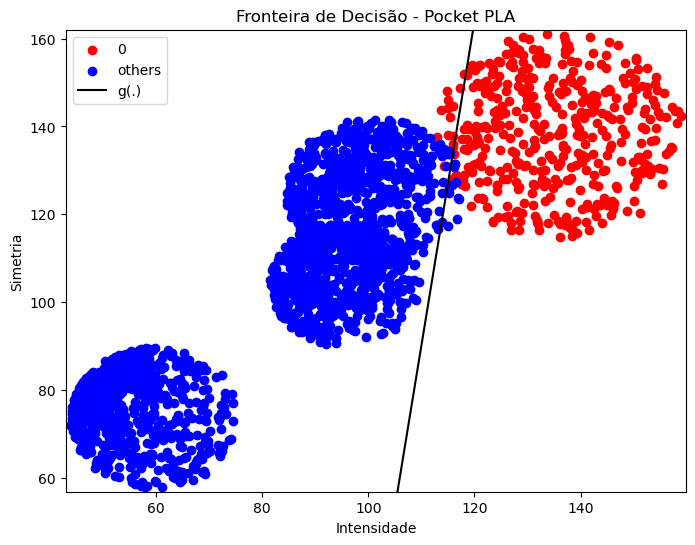

In [212]:
PLA_0.plot_decision_boundary(X_train, y_train_0, 0)

In [244]:
print(len(y_train_initial))
print(len(y_pred_0))

2186
2186


In [285]:
np.where(y_pred_0 == -1)

(array([  88,   92,   94, ..., 2183, 2184, 2185]),)

In [292]:
indices_deu_0 = np.where(y_pred_0 == 1)[0]
indices_nao_deu_0 = np.where(y_pred_0 == -1)[0]

y_train_1 = classe_digito(1, y_train_initial[indices_nao_deu_0])
PLA_1 = PocketPla(600000)
X_train_1 = X_train[indices_nao_deu_0]
PLA_1.fit(X_train_1, y_train_1)
y_pred_1 = PLA_1.predict(X_train_1)


Classe do digito 1 é: [-1 -1 -1 ... -1 -1 -1]


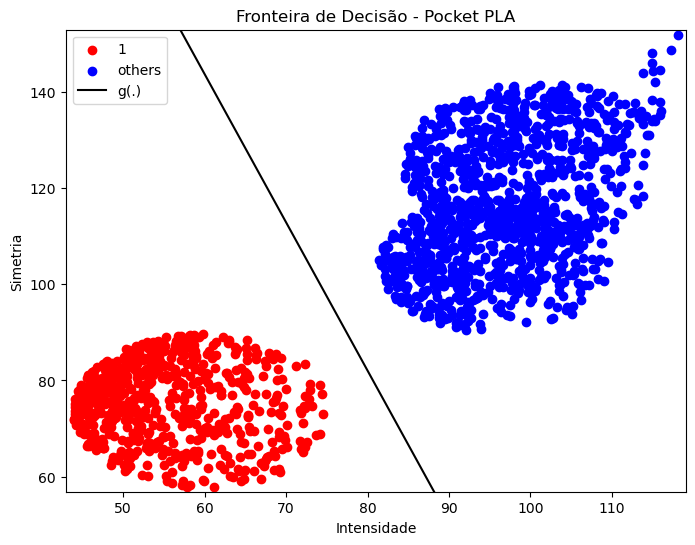

In [429]:
PLA_1.plot_decision_boundary(X_train_1, y_pred_1, 1)

In [352]:
indices_deu_1 = np.where(y_pred_1 == 1)[0]
indices_nao_deu_1 = indices_nao_deu_0[np.where(y_pred_1 == -1)[0]]

y_train_4 = classe_digito(4, y_train_initial[indices_nao_deu_1])
PLA_4 = PocketPla(1000000)
X_train_4 = X_train[indices_nao_deu_1]
PLA_4.fit(X_train_4, y_train_4)
y_pred_4 = PLA_4.predict(X_train_4)


Classe do digito 4 é: [-1 -1 -1 ... -1 -1 -1]


In [332]:
print(len(indices_deu_1))
print(len(indices_nao_deu_1))
print(len(indices_nao_deu_0))

608
1160
1768


In [338]:
PLA_4.best_w

array([  -1.        ,  -84.09019608, -101.96078431])

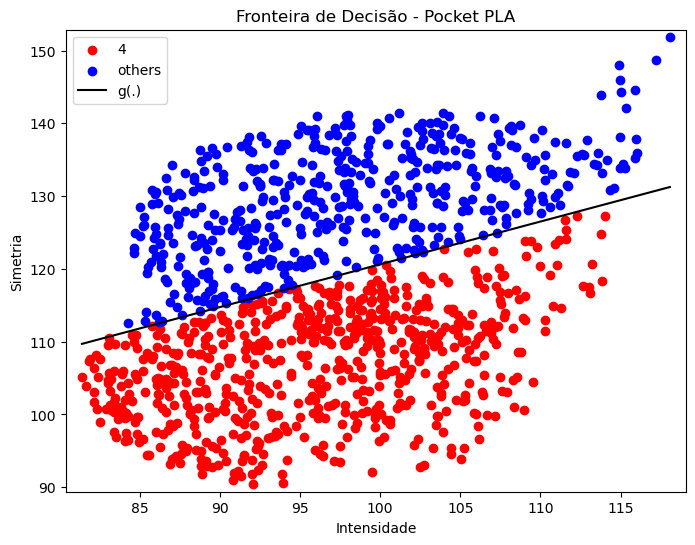

In [353]:
PLA_4.plot_decision_boundary(X_train_4, y_pred_4, 4)

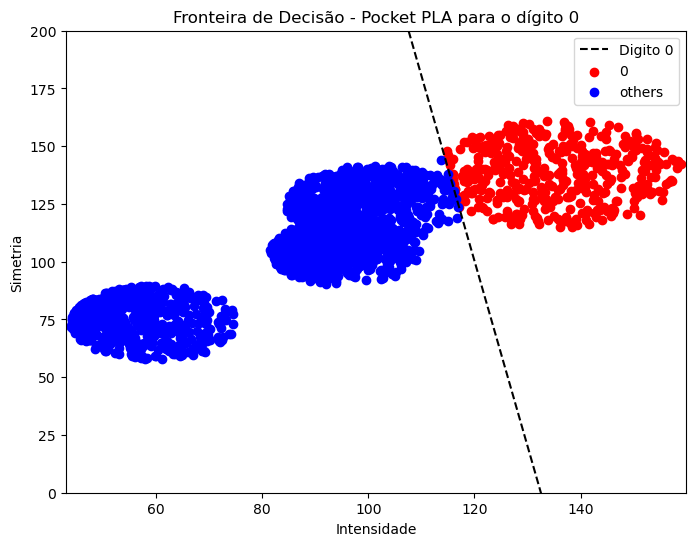

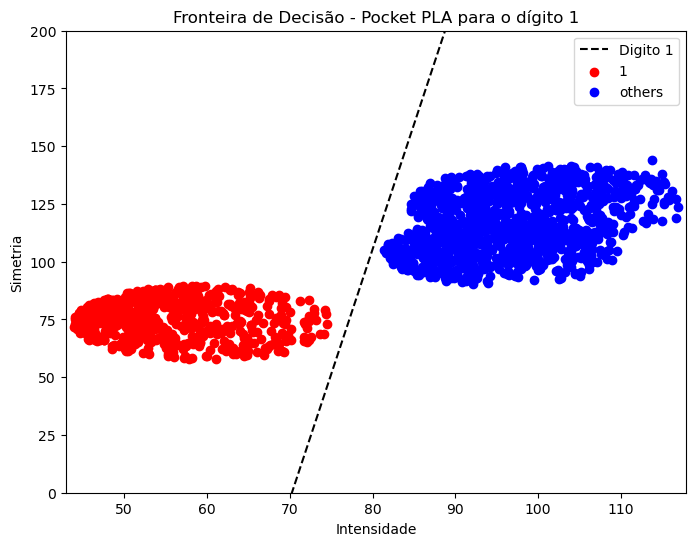

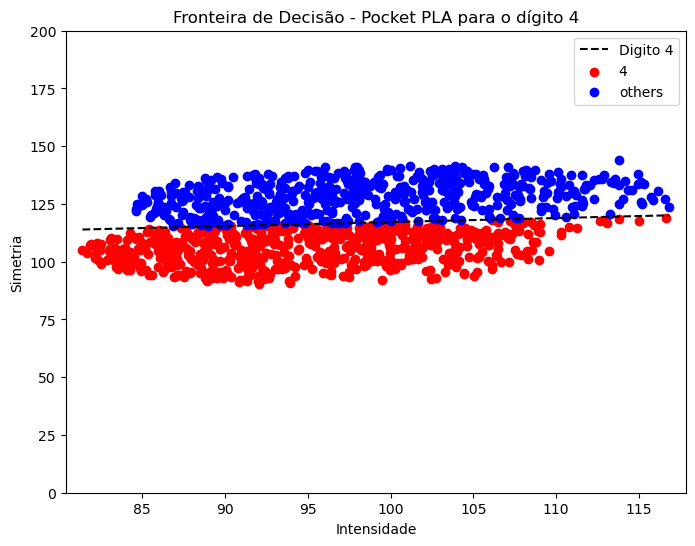

In [426]:
def classificar_sequencialmente(digitos, X_train, y_train_initial):
    """
    Classifica sequencialmente os dígitos usando Pocket PLA, preservando os índices do X_train original.
    Retorna um dicionário com os resultados das previsões para cada dígito.
    """
    resultados = {}  # Para armazenar resultados
    indices_restantes = np.arange(X_train.shape[0])  # Iniciar com todos os índices

    for digito in digitos:
        # Gerar y_train binarizado para o dígito atual
        y_train_bin = classe_digito(digito, y_train_initial[indices_restantes])
        
        # Inicializar e treinar o modelo para o dígito atual
        PLA = PocketPla(2000000)
        PLA.fit(X_train[indices_restantes], y_train_bin)
        
        # Fazer a predição
        y_pred = PLA.predict(X_train[indices_restantes])
        
        # Armazenar os resultados no dicionário
        resultados[digito] = {
            "modelo": PLA,
            "y_pred": y_pred,
            "indices": indices_restantes
        }
        # Plotar a fronteira de decisão para o dígito atual
        PLA.plot_decision_boundary(X_train[indices_restantes], y_pred, digito)
        # Atualizar os índices restantes para o próximo ciclo (mantendo apenas os que não foram classificados como 1)
        indices_restantes = indices_restantes[np.where(y_pred == -1)[0]]
        
        

    return resultados

# Lista de dígitos que você deseja classificar
digitos = [0,1,4]

# Chamar a função automatizada
resultados = classificar_sequencialmente(digitos, X_train, y_train_initial)


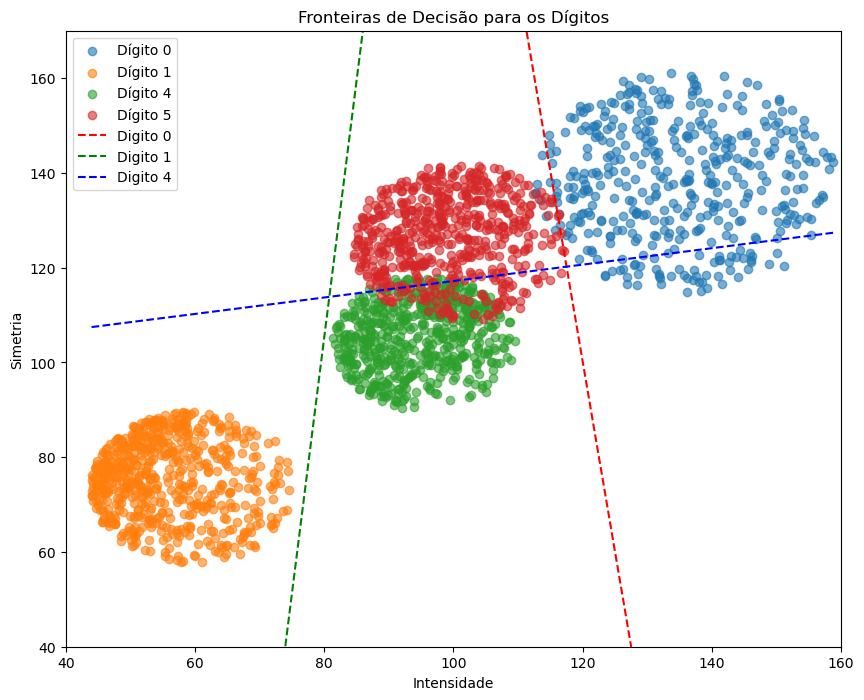

In [427]:
import matplotlib.pyplot as plt
import itertools

def plotar_retas_decisao(resultados, X, y):
    """
    Plota todas as retas de decisão em uma única figura, com os dados coloridos
    de acordo com os labels em y.
    
    resultados: Dicionário com os resultados das previsões para cada dígito.
    X: Dados de entrada (X_train ou X_test).
    y: Labels dos dados (y_test_initial).
    """
    plt.figure(figsize=(10, 8))

    # Calcular limites dinâmicos para os eixos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Plotar os pontos dos dados, coloridos de acordo com os labels
    for label in np.unique(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Dígito {label}', alpha=0.6)

    # Definir uma paleta de cores para as linhas de decisão
    colors = itertools.cycle(['red', 'green', 'blue', 'purple', 'orange'])

    # Plotar as retas de decisão de cada modelo
    for digito, res in resultados.items():
        modelo = res['modelo']
        color = next(colors)  # Pega a próxima cor da paleta
        modelo.plot_decision_boundary(X, np.where(y == digito, 1, -1), digito, color=color, plot=False)

    # Configurações finais do gráfico
    plt.title('Fronteiras de Decisão para os Dígitos')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.legend()
    plt.xlim(40, 160)
    plt.ylim(40, 170)
    plt.show()

# Exemplo de uso
plotar_retas_decisao(resultados, X_train, y_train_initial)


In [438]:
# esse deu errado mas vou testar dnv dps
PLA_0 = resultados[0]['modelo']
PLA_1 = resultados[1]['modelo']
PLA_4 = resultados[4]['modelo']

f_0 = PLA_0.predict(X_test)
f_1 = PLA_1.predict(X_test)
f_4 = PLA_4.predict(X_test)

def f_0(x):
    pred = PLA_0.predict(x)
    return pred

def f_1(x):
    pred = PLA_1.predict(x)
    return pred

def f_4(x):
    pred = PLA_4.predict(x)
    return pred

def f(x):
    if f_0(x) == 1:
        return 0
    elif f_1(x) == 1:
        return 1
    elif f_4(x) == 1:
        return 4
    else:
        return 5

In [455]:
import numpy as np

def f(x):
    pred_0 = f_0(x)
    pred_1 = f_1(x)
    pred_4 = f_4(x)

    # Create an array of predictions
    predictions = np.full(x.shape[0], 5)  # Start with the default label 5
    predictions[pred_0 == 1] = 0
    predictions[pred_1 == 1] = 1
    predictions[pred_4 == 1] = 4

    return predictions

pred_test = f(X_test)

array([0, 0, 0, ..., 5, 5, 0])

Linear Regression

vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [12]:
class LinearRegression():
    def __init__(self):
        self.w = None

    def getW(self):
        return self.w
    
    def fit(self, _X, _y):
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ _y
        return self
    
    def predict(self, _X):
        if self.w is None:
            raise Exception('Modelo não treinado')
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        return X @ self.w
    

class LRClassifier():
    def execute(self, _X, _y):
        lr = LinearRegression()
        lr.fit(_X, _y)
        self.w = lr.getW()
                
    def predict(self, x_):
        return np.sign(np.dot(np.insert(x_, 0, 1,axis=1), self.w))
     
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [13]:
lrc = LRClassifier()
lrc.execute(X_train, y_train_transformed)
w = lrc.w
predictions = lrc.predict(X_test)
accuracy = np.mean(predictions == y_test_transformed)
accuracy

0.9605381165919282

In [14]:
print(classification_report(y_test_transformed, predictions))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.98       897
           1       1.00      0.80      0.89       218

    accuracy                           0.96      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.96      0.96      0.96      1115



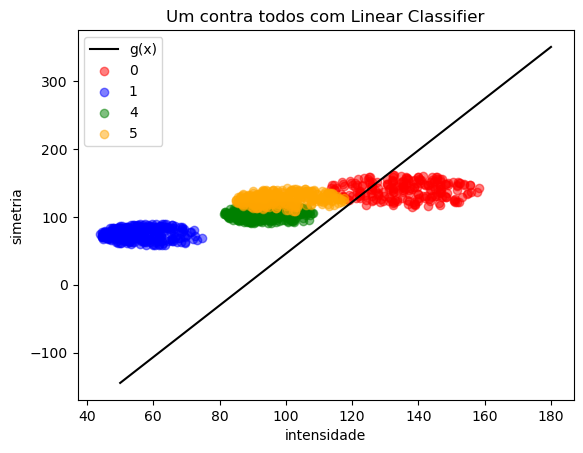

In [15]:
xOri = [50, 180]
yOri = [lrc.getRegressionY(xOri[0]), lrc.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, label='g(x)',color='black')
plt.scatter(label_0['intensidade'], label_0['simetria'],color='red', label='0', alpha=0.5)
plt.scatter(label_1['intensidade'], label_1['simetria'],color='blue', label='1', alpha=0.5)
plt.scatter(label_4['intensidade'], label_4['simetria'],color='g', label='4', alpha=0.5)
plt.scatter(label_5['intensidade'], label_5['simetria'],color='orange', label='5', alpha=0.5)
plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.title('Um contra todos com Linear Classifier')
plt.legend()
plt.show()